❗️ **本教程知识体系来源于**
**Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow, 2nd edition**
**作者为Aurélien Géron**

**知识产权归原作者所有，如有侵权请联系删除**

# 动手做机器学习教程2 - 一个简易的机器学习项目（上）
>在本节和下一节，我们会完整做完一个简单的机器学习项目，以此来说明做机器学习项目的大体流程。在本节，我们将进行有关数据的各种操作：数据的获得、可视化以及处理。
>
>数据来源：https://www.kaggle.com/spscientist/students-performance-in-exams

## 1.在开始之前...
### (1) 从哪里获得数据
* 在实际工作中，我们自然会从工作上级、工作甲方、项目上一环节处拿到我们需要的数据；但平日练习时，我们可以从以下几个网站获取开放数据集：
>[Kaggle数据集](https://www.kaggle.com/datasets)
>
>[加州大学尔湾分校机器学习数据集](http://archive.ics.uci.edu/ml/index.php)
>
>[数据堂](https://www.datatang.com)
>
>[阿里云天池数据集](https://tianchi.aliyun.com/dataset)

<div class="alert alert-info">
在本例中，我们从Kaggle获取了所需的数据：

该数据集包括一些学生的**性别、种族、父母教育水平、午餐选择（以此表现经济实力）、是否参与考试复习课**，以及数学、阅读、写作**三项考试的分数**。
</p></div>

### (2) 确定你的位置
* 数据管道(data pipeline)：真正的数据处理过程很像一条流水线，因此被称为数据管道。一般情况下，一个团队负责数据管道的一个环节，他们**拿到上一个环节处理好的数据，根据自己的目标进行处理，然后传给下一个环节**。这样既能方便每个团队进行工作，又能让整个系统易于监控。
* 根据位置确定你的目标：我们要先明白我们所做的工作处在数据管道的什么位置，并根据位置制定我们的目标。

<div class="alert alert-info">
假设整个项目的数据管道如下所示：
    
原始数据的获取→数据的初步清洗和整理→根据需求创建模型→投入使用，进行回归预测
    
我们的位置是**根据需求创建模型环节**，我们需要了解父母背景、考试复习课等要素对学生成绩的影响，并建立模型。这样，我们便可以把模型交给下一个环节，让他们根据一个学生的个人情况来对其考试分数进行预测。</p></div>

### (3) 确定你的系统
* 根据我们的数据类型以及目标，我们需要确定使用哪种机器学习系统。我们应该使用监督学习、无监督学习还是强化学习？我们在做的是回归、分类还是其他的任务？我们应该使用批量学习还是在线学习？如果读者不甚清楚，可以回顾我们**第一篇教程第三节**的部分。

<div class="alert alert-info">
答案：

由于我们的数据带有标签——每个学生的实际考试分数，因此我们应该使用监督学习。

这个项目做的是监督学习中的回归任务，因为我们要利用学生的情况来对其进行预测。

最后，因为我们的数据集仅是一个csv文档，且我们的项目不需要持续收集并快速更新数据，我们只需使用批量学习。</p></div>

❗️ ❗️ ❗️ 为了方便，我们假定**三门课程的分数是独立的**，即每门课程的分数不会对另外两门的分数造成任何影响（实际上可能并不是这样）。这样我们便可以利用回归算法分别对每一门分数进行建模并测试，接下来我们仅对**数学**一门课的分数进行建模并测试，阅读、写作同数学，仅更改代码中的列名并从头运行，便可对阅读、写作的分数进行建模。

**请切记我们的假设！**

### (4) 确定性能度量
* 在回归问题中，我们常使用两种性能度量(performance measurement)来考察模型：**均方根误差(RMSE)**和**平均绝对误差(MAE)**。

* 令$\pmb{x}^{(i)}$表示第i个数据除标签外的所有特征的值，它是一个列向量。
  
  令$y^{(i)}$表示第i个数据的标签的值。

  假设我们共有**m个数据**，则可以用矩阵$\pmb{X}$来代表我们数据集除标签外的所有特征的值：
  
  $$\pmb{X} = 
  \left(
  \begin{matrix}
   (\pmb{x}^{(1)})^{T}    \\
   (\pmb{x}^{(2)})^{T}    \\
   \vdots                 \\
   (\pmb{x}^{(m)})^{T}    \\
  \end{matrix}
  \right)
  $$
  其中T表示将列向量转置为行向量。
  
  $h(\pmb{x})$代表我们系统的预测函数。我们输入一个列向量，函数会输出一个预测值$\hat{y}$


* 均方根误差（RMSE）：$$ RMSE(\pmb{X},h) = \sqrt{\frac{1}{m} \sum_{i=1}^{m} ({\hat{y}^{(i)}-y^{(i)}})^{2}} = \sqrt{\frac{1}{m} \sum_{i=1}^{m} ({h(\pmb{x}^{(i)})-y^{(i)}})^{2}} $$


* 平均绝对误差（MAE）:$$ MAE(\pmb{X},h) = \frac{1}{m} \sum_{i=1}^{m} \mid{\hat{y}^{(i)}-y^{(i)}}\mid = \frac{1}{m} \sum_{i=1}^{m} \mid{h(\pmb{x}^{(i)})-y^{(i)}}\mid $$


* 一般情况下，我们都可以使用均方根误差来作为我们的性能度量。若数据中**异常值太多**，则我们可以使用平均绝对误差。

❗️ 注意：这两种性能度量在检测时，返回值越**低**表明模型拟合度越好。

### (5) 沟通&复查
* 我们马上就要开始了，在此之前，我们需要再次与数据管道的上一环节、下一环节进行沟通，让他们了解我们在(2)(3)(4)中所做的事。若他们没有任何问题，我们就可以开始了！

## 2.开始！
### (1) 建立工作空间
* 我们所使用的工具是**Python 3.6与TensorFlow 2.0.0**。我们可以在[Openbayes](https://openbayes.com/)中新建算力容器，并选择**TensorFlow 2.0.0**，这样系统会自动生成Jupyter Notebook，我们便可以开始敲代码了。
* 当然，我们也可以通过在电脑上安装Python和Jupyter Notebook来自己新建Notebook。您可以访问[Anaconda官网](https://www.anaconda.com/)来下载它们。

<div class="alert alert-info">
我们选择使用Openbayes来进行以下所有操作：先上传所需的数据集，再新建算力容器并打开Jupyter Notebook。
</p></div>

* 第一步：在Openbayes控制台点击①处（**新建数据集**），并在此②处对数据集的名称和③处对描述进行完善，类别**不做更改**（即选择“数据集”），最后点击④处创建数据集。

<img src="Pictures/2新建数据集.jpg" width = 80% height = 80% div align=center /> 
  
  
* 第二步：我们选择“上传数据”，并上传我们从Kaggle上下载的csv文件。
  
<img src="Pictures/2上传数据.jpg" width = 80% height = 80% div align=center /> 
  

* 第三步：在Openbayes控制台点击**新建算力容器**。

<img src="Pictures/2新建算力容器.jpg" width = 20% height = 20% div align=center /> 


* 第四步：对容器信息进行完善。

<img src="Pictures/2容器名称.jpg" width = 80% height = 80% div align=center /> 
    
在①处填写容器名称→点击②处，选择我们刚创建的数据集，绑定的目录**不做更改**（即绑定至/input0）→点击③处的下拉箭头，选择**TensorFlow 2.0.0**→点击④创建容器
  
* 第五步：稍等片刻，等待**“打开Jupyter编辑器”**按钮出现后，点击该按钮。

<img src="Pictures/2打开jupyter.jpg" width = 80% height = 80% div align=center /> 

点击“Launcher”，并选择“Python3”
    
<img src="Pictures/2launcher.jpg" width = 80% height = 80% div align=center />
<img src="Pictures/2python.jpg" width = 80% height = 80% div align=center />


* 我们已经进入Notebook界面了。

<img src="Pictures/2进入notebook.jpg" width = 80% height = 80% div align=center />

<div class="alert alert-info">
我们使用Notebook来进行以下所有操作：
</p></div>


### (2) 读取数据
我们利用Python的**pandas库**来将csv文件读至一个DataFrame中。

In [1]:
import pandas as pd
data = pd.read_csv('F:\python\Jupyter\OpenBayes\StudentsPerformance.csv')

### (3) 大致了解数据
我们先用DataFrame的**head()**方法看一下数据的前五行，以此来对数据有大概的了解：

In [2]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


我们发现，每个同学都有五个特征：“gender”（性别）、“race/ethnicity”（种族）、“parental level of education”（父母受教育程度）、“lunch”（午餐标准）、“test preparation course”（是否参与考试复习课）。数据集中还给出了每个同学三门考试的成绩。

我们再利用**info()**方法对数据做出简单的总结：

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
gender                         1000 non-null object
race/ethnicity                 1000 non-null object
parental level of education    1000 non-null object
lunch                          1000 non-null object
test preparation course        1000 non-null object
math score                     1000 non-null int64
reading score                  1000 non-null int64
writing score                  1000 non-null int64
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


数据集中共有1000个数据，五个特征与三门成绩均有1000个非空值，说明数据集中**没有空值（NA）**，如果有空值，我们需要用**fillna()**来填补空值。具体做法可以参考[Pandas的官方说明](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.fillna.html)或[Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow, 2nd edition](http://shop.oreilly.com/product/0636920142874.do)一书。

三门成绩的数据类型均为“int64”，均为数值型数据；五个特征的数据类型均为“object”，因此其有可能为任何python对象，由head()我们可知，五个特征均为文本型数据。

如果我们打开csv文件并仔细看，可以发现五个特征均是“类别”特征(categorical attribute)，因为每一列均是将每个学生进行分类，我们可以利用**values_count()**来看每一列究竟是如何分类的，如：

In [4]:
data["gender"].value_counts()

female    518
male      482
Name: gender, dtype: int64

❗️ 我们拿到数据后发现其特征全为类别特征，因此处理数据十分麻烦。在实际应用中，我们可以和数据管道上一环节的人反馈，令其在以后给数据时，将所有的类别特征合理地转化为数字特征，这样会方便我们的工作。

我们可以用**hist()**方法来画出数字型数据的直方图。因为我们只预测数学成绩，我们将数学成绩的直方图画出来：

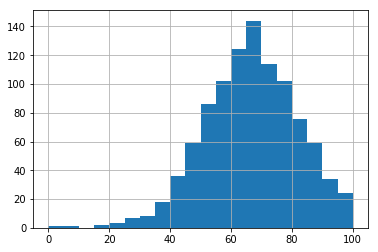

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
data["math score"].hist(bins=20)
plt.show()

大多数机器学习算法更容易处理数字型数据，因此我们要想办法将类别特征转化为数字特征。我们有多种方法来做到这点，但是在此之前，我们需要创建测试集。

❗️ 为什么我们不在创建测试集前就将类别特征转化为数字特征？在测试时，我们将测试集看作**未来**系统投入使用后输入的数据，鉴于我们无法“预知未来”，我们需要在对数据集做进一步修改前就将测试集分出去，且**在训练和验证过程中，永不使用测试集**。

### (4) 创建测试集
我们可以用sklearn库的**train_test_split()**函数来创建测试集。利用train_test_split()来创建测试集是根据种子(random_state)"随机抽样"的，如果我们的数据集很大（如数十万条数据），可以运用这个函数。但是我们的数据集仅有1000条数据，随机抽样会导致测试集无法代表整体数据。我们接下来便验证这一点：

由于我们要预测数学成绩，我们可以将测试集和整体数据的数学成绩大体分布进行对比。通过直方图我们可以看出，大多数的成绩聚集于40-90之间，我们可以用**cut()**将其分成(-∞,40]，(40,50]，(50,60]，(60,70]，(70,80]，(80,90]，(90,100]七个组，并将组名命名为1-7，最后将组名作为新的一列加入至数据集中，列名命名为"math category"：

In [6]:
import numpy as np
data["math category"] = pd.cut(data["math score"], bins = [-np.inf, 40, 50, 60, 70, 80, 90, 100], labels = [1, 2, 3, 4, 5, 6, 7])

我们计算出每组所占的百分比：

In [7]:
data["math category"].value_counts()/len(data)

4    0.270
5    0.215
3    0.189
6    0.126
2    0.100
7    0.050
1    0.050
Name: math category, dtype: float64

现在我们用sklearn库的**train_test_split()**函数来创建测试集，令测试集的大小为整体数据集的20%(test_size=0.2)：

In [8]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(data, test_size = 0.2, random_state = 1)

我们再算出随机抽样的测试集中每组占的百分比：

In [9]:
test_set["math category"].value_counts()/len(test_set)

4    0.290
3    0.205
5    0.170
6    0.140
2    0.115
1    0.045
7    0.035
Name: math category, dtype: float64

我们可以算出相对误差： 1：-20.00%  2：15.00%  3：8.47%  4：7.41%  5：-20.93%  6：11.11%  7：-30.00%

可以看出，随机抽样的相对误差很大。如果我们继续下去，最后得到的模型很可能并不适用于现实数据。

因此我们需要分层抽样(stratified sampling)，我们使用sklearn的**StratifiedShuffleSplit()**类来根据math category做分成抽样：

In [10]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits = 1, test_size = 0.2, random_state = 1)
for train_index, test_index in split.split(data, data["math category"]):
    strat_train_set = data.loc[train_index]
    strat_test_set = data.loc[test_index]

我们再算出分成抽样抽取的测试集中每组占的百分比:

In [11]:
strat_test_set["math category"].value_counts()/len(strat_test_set)

4    0.270
5    0.215
3    0.190
6    0.125
2    0.100
7    0.050
1    0.050
Name: math category, dtype: float64

我们可以算出相对误差：1：0%, 2：0%, 3：5.29%, 4：0%, 5：0%, 6：-8.00%, 7：0%

注意此处的0%并不指**一定没有误差**，只是我们按比例算，误差极其小而已。无论如何，我们可以看到，分层抽样的误差较小，因此我们将会把分层抽样出的测试集作为我们的测试集。在此之前，由于我们不想在创建测试集前对数据集进行修改，而math category一列是我们为分测试集而加入的，之后也不需要它，我们**将其删除**。

In [12]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("math category", axis=1, inplace = True)

现在strat_train_set和strat_test_set是两个不交的集合，二者的并是原数据集。strat_test_set是我们的测试集，在测试前，我们不动测试集。

## 3.为算法准备数据
### (1) 数据清洗
我们将要对训练集进行数据清洗，为了保留训练集的备份，我们需要复制一个训练集，然后对复制的训练集进行清洗及后续操作。同时，我们只想对五个特征进行数据清洗，我们需要将五个特征和三门成绩**分开**，鉴于我们只预测数学成绩，我们的**标签只是数学成绩**，我们暂时可以抛弃其他两门成绩：

In [13]:
copy = strat_train_set[["gender","race/ethnicity","parental level of education","lunch","test preparation course"]]
copy_label = strat_train_set["math score"].copy()

### (2) 将类别特征转化为数字特征
我们注意到数据的五个特征全是类别特征，没有数字特征，因此我们现在需要将类别特征全部转化为数字特征，然后才能选择算法。我们可以使用sklearn的**ColumnTransformer和OneHotEncoder**：

In [14]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
attributes = list(copy)
full_pipeline = ColumnTransformer([("cat",OneHotEncoder(),attributes)])
copy_encoded = full_pipeline.fit_transform(copy)
copy_encoded

<800x17 sparse matrix of type '<class 'numpy.float64'>'
	with 4000 stored elements in Compressed Sparse Row format>

我们将训练集转化为了800行17列的稀疏矩阵(sparse matrix)，我们可以使用对数据套用模型了。在下一篇教程将会包括有关模型与算法的部分。因为下一篇教程是另一个python3文件，我们需要将copy_label，copy_encoded，strat_train_set和strat_test_set存到本地，在下一篇教程中再次读取：

In [15]:
from scipy import sparse
sparse.save_npz('copy_encoded.npz',copy_encoded)
copy_label.to_csv('copy_label.csv',index=False, header=True)
strat_train_set.to_csv('strat_train_set.csv', index=False, header=True)
strat_test_set.to_csv('strat_test_set.csv', index=False, header=True)

## 参考资料：
* “Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow, 2nd edition”  作者：Aurélien Géron